<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/pandas_and_scikit_learn_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/320px-Scikit_learn_logo_small.svg.png">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Pandas_mark.svg/128px-Pandas_mark.svg.png"></center>


# Summary

As an introductory example using both [scikit-learn](https://scikit-learn.org/)  and [pandas](https://pandas.pydata.org/), this notebook is introduced. Therefore:

1. Check that you have seen [this notebook](https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/scikit_learn_introduction_classification.ipynb), where a minimal introduction to scikit-learn for classification was carried out.
2. Check that ou have seen [this notebook](https://colab.research.google.com/github/albertofernandezvillan/dl-ml-notebooks/blob/main/pandas_introduction.ipynb), where a minimal introduction to pandas was given.




# Downloading the data

First step is to import the required packages. Second step is to load the data from this [link](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/iris.csv). Note also that [there are other datasets to play with](https://github.com/scikit-learn/scikit-learn/tree/main/sklearn/datasets/data). 

In [ ]:
# Import required packages:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
# Load the data and show the first rows
iris_url = "https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/iris.csv"
data = pd.read_csv(iris_url)
data.head(5)

,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


As it can be seen above, we have problems with the headers. What we can do is to set `skiprows = 1` and `header = None`. Later on, we will define our headers.

In [ ]:
data = pd.read_csv(iris_url, skiprows = 1, header = None)
data.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


At this point, we can define our headers:

- `sepal_length`,`sepal_width`, `petal_length`, `petal_width` for the features
- `species` for the target variable


In [ ]:
data.columns = ["sepal_length","sepal_width", "petal_length", "petal_width", "species"]
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We can call [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) method, which generates descriptive statistics.

In [ ]:
# Show statistics:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We can also count the number of species for each type ('setosa','versicolor','virginica').

In [ ]:
# Show how many species are for each class:
data.groupby('species').size()

species
0    50
1    50
2    50
dtype: int64

We will see if there are some duplicates:

In [ ]:
print("Number of rows: {}".format(data.shape[0]))

data_without_duplicates = data.drop_duplicates()
print("Number of rows after eliminating duplicates: {}".format(data_without_duplicates.shape[0]))

Number of rows: 150
Number of rows after eliminating duplicates: 149


From the output above, we can see that there are two rows that are duplicated. We can make use of [duplicated()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicated), which return a boolean series for each duplicated rows. By default, for each set of duplicated values, the first occurrence is set on `False` and all others on `True`. By setting `keep=False`, all duplicates are `True`. Therefore, set `keep = False` to see the duplicated rows as follows:



In [ ]:
dup = data[data.duplicated(keep = False)]
dup

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2


So finally, we can eliminate the duplicates from `data`:

In [ ]:
# Eliminate duplicates:
data.drop_duplicates(inplace=True)

In [ ]:
# Check that all duplicates are eliminated:
dup = data[data.duplicated(keep = False)]
dup

,sepal_length,sepal_width,petal_length,petal_width,species


We can check that the eliminated specie is from class `2`:

In [ ]:
# Show how many species are for each class:
data.groupby('species').size()

species
0    50
1    50
2    49
dtype: int64

Now, our data is free of duplicates. We can also see if there are any null value. Let's check how many null values are in each column.

In [ ]:
data.isnull().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

From the previous output we can see that there are no null values. At this point, we are ready to train our classifier.

# Training a classifier

What we can do first is to split the dataset into training and test sets. The following example will split the data into `80:20` ratio, i.e. `80%` data will be used as training data and `20%` will be used as testing data. `random_state` argument is used to guarantee that the split will always be the same. This is useful in the situations where you want reproducible results.



In [ ]:
train, test = train_test_split(data, test_size = 0.2, random_state = 123)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
129,7.2,3.0,5.8,1.6,2
119,6.0,2.2,5.0,1.5,2
29,4.7,3.2,1.6,0.2,0
0,5.1,3.5,1.4,0.2,0
62,6.0,2.2,4.0,1.0,1


Let’s separate out the class label and features from our training data:

In [ ]:
x_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train[['species']]

At this point, we can create the classifier and train it using a similar approach we performed in [this notebook](https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/scikit_learn_introduction_classification.ipynb#scrollTo=IbWTU_6yCgTP). 
Scikit-learn provides easy access to numerous different classification algorithms (estimators).  An example of an estimator is the class `sklearn.tree.DecisionTreeClassifier`, which implements [a decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).


In [ ]:
# Create the decision tree classifier
tree_classifier=tree.DecisionTreeClassifier(random_state=0, max_depth=3)

# We can train the model with fit function:
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Scikit-learn also allows us to visualise our tree using the Graphviz library. [sklearn.tree.export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) generates a GraphViz representation of the decision tree. In this sense, we are going to color the nodes based on the feature names. We are also going to display the class and feature information of each node.

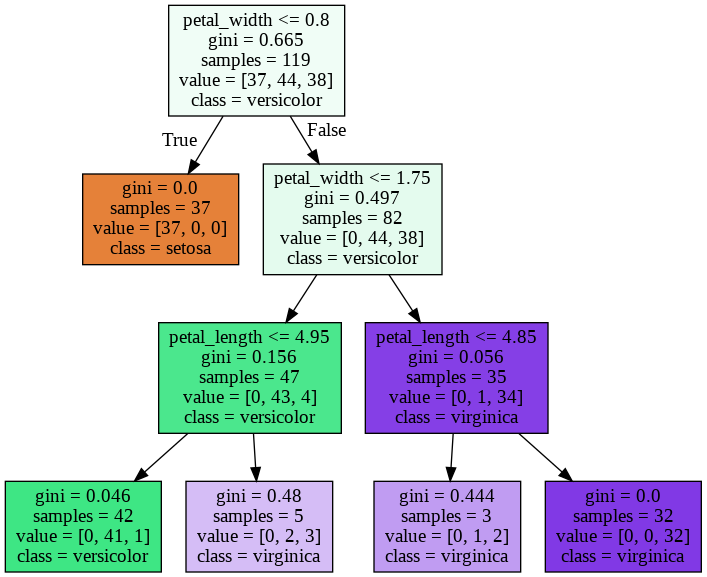

In [ ]:
import graphviz 
from IPython.display import Image

# Set the options to adapt the visualization:
options = tree.export_graphviz(tree_classifier, out_file=None, 
                               feature_names=x_train.columns.values,
                               # class_names=iris.target_names,
                               class_names = ['setosa','versicolor','virginica'],
                               filled=True)
# Get the png image, save it and view it:
graph = graphviz.Source(options)  
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)
Image(png_bytes)

# Conclusion


In this notebook, we have performed a minimal example using both pandas and scikit-learn to tackle a classification problem.

Note also that we have only trained the classifier but other points are missing (e.g. making predictions using the trained model, measuring the performance, model persistence,...). See [this notebook](https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/scikit_learn_introduction_classification.ipynb), where aforementioned topics are covered using also this dataset.

You can check this post if you want to learn more about [Exploratory Data Analysis (EDA) using this database](https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b). 

